### Analyses of output files from the pipeline optimus v6.0.0
#### Aim of this part of analysis is to check if the output file from the pipeline is correct by realizing soem preprocessing and visualization

#### 1. Load necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [63]:
import scanpy as sc
import anndata as ad
import seaborn as sns
import numpy as np
from scipy.stats import median_abs_deviation

In [ ]:
#import warnings
#warnings.filterwarnings("ignore")  # suppress warnings

#### 2. Data Loading

In [7]:
# Load the data directly from bucket
gcs_url = "gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/submissions/0edaa628-d5d3-4dda-a90b-3d70d4905e7a/Optimus/2587b679-7ef8-46fb-b239-65c56a156b0e/call-OptimusH5adGeneration/10k_pbmc_v3.h5ad"

adata = ad.read_h5ad(gcs_url)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/submissions/0edaa628-d5d3-4dda-a90b-3d70d4905e7a/Optimus/2587b679-7ef8-46fb-b239-65c56a156b0e/call-OptimusH5adGeneration/10k_pbmc_v3.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [8]:
# Load the data locally
input_h5ad = "../scAtlas/optimus/test_data/OptimusH5adGeneration_10k_pbmc_v3.h5ad"

adata_raw = sc.read_h5ad(input_h5ad)
adata_raw 

/opt/homebrew/Caskroom/miniconda/base/envs/bulk/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 1136912 × 58347
    obs: 'cell_names', 'CellID', 'emptydrops_Limited', 'emptydrops_IsCell', 'n_reads', 'noise_reads', 'perfect_molecule_barcodes', 'reads_mapped_exonic', 'reads_mapped_exonic_as', 'reads_mapped_intronic', 'reads_mapped_intronic_as', 'reads_mapped_uniquely', 'reads_mapped_multiple', 'duplicate_reads', 'spliced_reads', 'antisense_reads', 'n_molecules', 'n_fragments', 'fragments_with_single_read_evidence', 'molecules_with_single_read_evidence', 'perfect_cell_barcodes', 'reads_mapped_intergenic', 'reads_unmapped', 'reads_mapped_too_many_loci', 'n_genes', 'genes_detected_multiple_observations', 'emptydrops_Total', 'molecule_barcode_fraction_bases_above_30_mean', 'molecule_barcode_fraction_bases_above_30_variance', 'genomic_reads_fraction_bases_quality_above_30_mean', 'genomic_reads_fraction_bases_quality_above_30_variance', 'genomic_read_quality_mean', 'genomic_read_quality_variance', 'reads_per_molecule', 'reads_per_fragment', 'fragments

In [9]:
adata_raw.var_names_make_unique()
adata_raw
#TODO: check warning

/opt/homebrew/Caskroom/miniconda/base/envs/bulk/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


AnnData object with n_obs × n_vars = 1136912 × 58347
    obs: 'cell_names', 'CellID', 'emptydrops_Limited', 'emptydrops_IsCell', 'n_reads', 'noise_reads', 'perfect_molecule_barcodes', 'reads_mapped_exonic', 'reads_mapped_exonic_as', 'reads_mapped_intronic', 'reads_mapped_intronic_as', 'reads_mapped_uniquely', 'reads_mapped_multiple', 'duplicate_reads', 'spliced_reads', 'antisense_reads', 'n_molecules', 'n_fragments', 'fragments_with_single_read_evidence', 'molecules_with_single_read_evidence', 'perfect_cell_barcodes', 'reads_mapped_intergenic', 'reads_unmapped', 'reads_mapped_too_many_loci', 'n_genes', 'genes_detected_multiple_observations', 'emptydrops_Total', 'molecule_barcode_fraction_bases_above_30_mean', 'molecule_barcode_fraction_bases_above_30_variance', 'genomic_reads_fraction_bases_quality_above_30_mean', 'genomic_reads_fraction_bases_quality_above_30_variance', 'genomic_read_quality_mean', 'genomic_read_quality_variance', 'reads_per_molecule', 'reads_per_fragment', 'fragments

In [10]:
display(adata_raw.obs.shape)
display(adata_raw.obs.head())

(1136912, 45)

,cell_names,CellID,emptydrops_Limited,emptydrops_IsCell,n_reads,noise_reads,perfect_molecule_barcodes,reads_mapped_exonic,reads_mapped_exonic_as,reads_mapped_intronic,...,fragments_per_molecule,cell_barcode_fraction_bases_above_30_mean,cell_barcode_fraction_bases_above_30_variance,n_mitochondrial_genes,n_mitochondrial_molecules,pct_mitochondrial_molecules,emptydrops_LogProb,emptydrops_PValue,emptydrops_FDR,input_id
AAACCCAAGAAACACT,AAACCCAAGAAACACT,AAACCCAAGAAACACT,True,False,1,0,1,1,0,0,...,1.000000,0.937500,NaN,0,0,0.000000,NaN,NaN,NaN,10k_pbmc_v3
AAACCCAAGAAACCAT,AAACCCAAGAAACCAT,AAACCCAAGAAACCAT,True,False,1,0,1,1,0,0,...,1.000000,1.000000,NaN,0,0,0.000000,NaN,NaN,NaN,10k_pbmc_v3
AAACCCAAGAAACTAC,AAACCCAAGAAACTAC,AAACCCAAGAAACTAC,True,False,3,0,3,3,0,0,...,2.000000,1.000000,0.000000,0,0,0.000000,NaN,NaN,NaN,10k_pbmc_v3
AAACCCAAGAAACTCA,AAACCCAAGAAACTCA,AAACCCAAGAAACTCA,True,False,120,0,120,76,0,0,...,1.066038,0.953646,0.004956,3,4,3.333333,NaN,NaN,NaN,10k_pbmc_v3
AAACCCAAGAAACTGT,AAACCCAAGAAACTGT,AAACCCAAGAAACTGT,True,False,3,0,3,2,0,0,...,1.000000,0.958333,0.005208,0,0,0.000000,NaN,NaN,NaN,10k_pbmc_v3


In [11]:
# Filter the DataFrame to keep only rows where 'emptydrops_IsCell' is True
filtered_df = adata_raw.obs[adata_raw.obs['emptydrops_IsCell'] == True]
display(filtered_df.shape)
display(filtered_df.head())

(11031, 45)

,cell_names,CellID,emptydrops_Limited,emptydrops_IsCell,n_reads,noise_reads,perfect_molecule_barcodes,reads_mapped_exonic,reads_mapped_exonic_as,reads_mapped_intronic,...,fragments_per_molecule,cell_barcode_fraction_bases_above_30_mean,cell_barcode_fraction_bases_above_30_variance,n_mitochondrial_genes,n_mitochondrial_molecules,pct_mitochondrial_molecules,emptydrops_LogProb,emptydrops_PValue,emptydrops_FDR,input_id
AAACCCAAGCGCCCAT,AAACCCAAGCGCCCAT,AAACCCAAGCGCCCAT,True,True,22134,0,21987,8312,0,0,...,2.868404,0.933759,0.008753,10,201,0.908105,-4075.569995,0.000100,0.000191,10k_pbmc_v3
AAACCCAAGGTTCCGC,AAACCCAAGGTTCCGC,AAACCCAAGGTTCCGC,True,True,136975,0,135581,81724,0,0,...,2.878858,0.948245,0.008612,17,5144,3.755430,-14284.870262,0.000100,0.000000,10k_pbmc_v3
AAACCCACAGACAAGC,AAACCCACAGACAAGC,AAACCCACAGACAAGC,True,True,2598,0,2556,2069,0,0,...,2.755291,0.942071,0.008083,11,189,7.274827,-1742.751745,0.000100,0.000191,10k_pbmc_v3
AAACCCACAGAGTTGG,AAACCCACAGAGTTGG,AAACCCACAGAGTTGG,False,True,33474,0,33055,21574,0,0,...,2.532718,0.942177,0.009162,15,2080,6.213778,-6403.743800,0.012099,0.000000,10k_pbmc_v3
AAACCCACAGGTATGG,AAACCCACAGGTATGG,AAACCCACAGGTATGG,True,True,46998,0,46555,21305,0,0,...,2.766109,0.942274,0.008886,14,1657,3.525682,-7813.832561,0.000100,0.000000,10k_pbmc_v3


In [12]:
display(adata_raw.var.shape)
display(adata_raw.var.head())

(58347, 30)

,gene_names,ensembl_ids,Gene,n_reads,noise_reads,perfect_molecule_barcodes,reads_mapped_exonic,reads_mapped_exonic_as,reads_mapped_intronic,reads_mapped_intronic_as,...,genomic_read_quality_variance,n_molecules,n_fragments,reads_per_molecule,reads_per_fragment,fragments_per_molecule,fragments_with_single_read_evidence,molecules_with_single_read_evidence,number_cells_detected_multiple,number_cells_expressing
DDX11L1,DDX11L1,ENSG00000223972.5,DDX11L1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WASH7P,WASH7P,ENSG00000227232.5,WASH7P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIR6859-1,MIR6859-1,ENSG00000278267.1,MIR6859-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIR1302-2HG,MIR1302-2HG,ENSG00000243485.5,MIR1302-2HG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIR1302-2,MIR1302-2,ENSG00000284332.1,MIR1302-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
adata_raw.var_names

Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A',
       'AL627309.6', 'OR4G11P', 'OR4F5', 'AL627309.1',
       ...
       '-49', '-50', '-51', '-52', '-53', '-54', '-55', '-56', '-57', '-58'],
      dtype='object', length=58347)

In [17]:
display(adata_raw.var.tail())
#TODO: why have empty gene name

,gene_names,ensembl_ids,Gene,n_reads,noise_reads,perfect_molecule_barcodes,reads_mapped_exonic,reads_mapped_exonic_as,reads_mapped_intronic,reads_mapped_intronic_as,...,genomic_read_quality_variance,n_molecules,n_fragments,reads_per_molecule,reads_per_fragment,fragments_per_molecule,fragments_with_single_read_evidence,molecules_with_single_read_evidence,number_cells_detected_multiple,number_cells_expressing
-54,,ENSG00000276017.1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-55,,ENSG00000278817.1,,512.0,0.0,493.0,512.0,0.0,0.0,0.0,...,3.157284,270.0,405.0,1.896296,1.264198,1.5,317.0,142.0,127.0,263.0
-56,,ENSG00000277196.4,,2.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.034768,1.0,2.0,2.000000,1.000000,2.0,2.0,0.0,1.0,1.0
-57,,ENSG00000278625.1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-58,,ENSG00000277374.1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
adata_raw.var["gene_names"]

DDX11L1            DDX11L1
WASH7P              WASH7P
MIR6859-1        MIR6859-1
MIR1302-2HG    MIR1302-2HG
MIR1302-2        MIR1302-2
                  ...     
-54                       
-55                       
-56                       
-57                       
-58                       
Name: gene_names, Length: 58347, dtype: category
Categories (56610, object): ['', '5S_rRNA', '5_8S_rRNA', '7SK', ..., 'snoZ196', 'snoZ278', 'snosnR66', 'uc_338']

In [19]:
display(adata_raw.uns)

OverloadedDict, wrapping:
	{'expression_data_type': 'exonic', 'input_id': '10k_pbmc_v3', 'optimus_output_schema_version': '1.0.1', 'pipeline_version': 'Optimus_v6.0.0'}
With overloaded keys:
	['neighbors'].

In [15]:
import numpy as np

# sparse matrix is named 'sparse_matrix'
sparse_matrix = adata_raw.X

# Convert the sparse matrix to a dense NumPy array
dense_matrix = sparse_matrix.toarray()

# use regular NumPy indexing to see the head
head = dense_matrix[:5, :]  # Assuming you want to see the first 5 rows
print(head)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### 3. Filtering low quality reads

In [44]:
# mitochondrial genes: MT- for human data, mt- for mouse data
adata_raw.var["mt"] = adata_raw.var_names.str.startswith("MT-")
# ribosomal genes
adata_raw.var["ribo"] = adata_raw.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata_raw.var["hb"] = adata_raw.var_names.str.contains(("^HB[^(P)]"))

In [45]:
# add qc metric to obs
sc.pp.calculate_qc_metrics(
    adata_raw, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata_raw

AnnData object with n_obs × n_vars = 1136912 × 58347
    obs: 'cell_names', 'CellID', 'emptydrops_Limited', 'emptydrops_IsCell', 'n_reads', 'noise_reads', 'perfect_molecule_barcodes', 'reads_mapped_exonic', 'reads_mapped_exonic_as', 'reads_mapped_intronic', 'reads_mapped_intronic_as', 'reads_mapped_uniquely', 'reads_mapped_multiple', 'duplicate_reads', 'spliced_reads', 'antisense_reads', 'n_molecules', 'n_fragments', 'fragments_with_single_read_evidence', 'molecules_with_single_read_evidence', 'perfect_cell_barcodes', 'reads_mapped_intergenic', 'reads_unmapped', 'reads_mapped_too_many_loci', 'n_genes', 'genes_detected_multiple_observations', 'emptydrops_Total', 'molecule_barcode_fraction_bases_above_30_mean', 'molecule_barcode_fraction_bases_above_30_variance', 'genomic_reads_fraction_bases_quality_above_30_mean', 'genomic_reads_fraction_bases_quality_above_30_variance', 'genomic_read_quality_mean', 'genomic_read_quality_variance', 'reads_per_molecule', 'reads_per_fragment', 'fragments

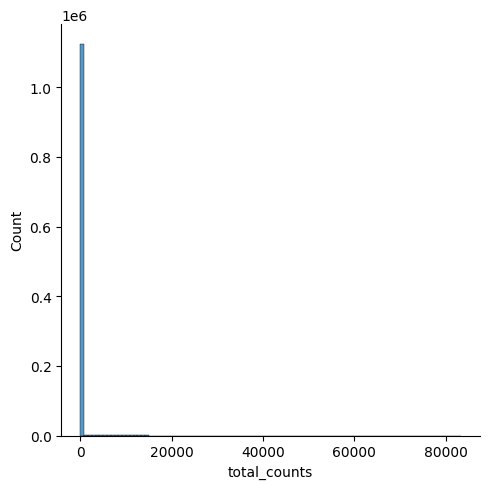

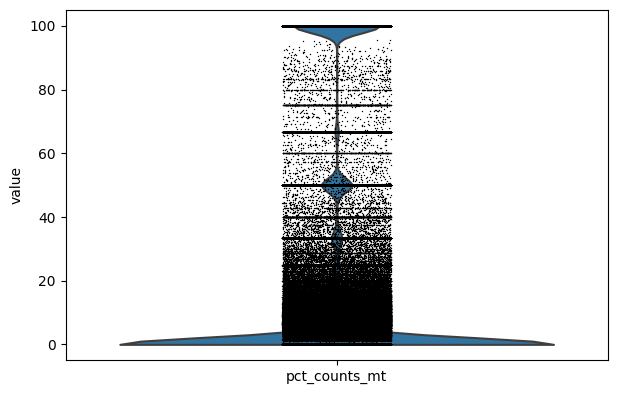

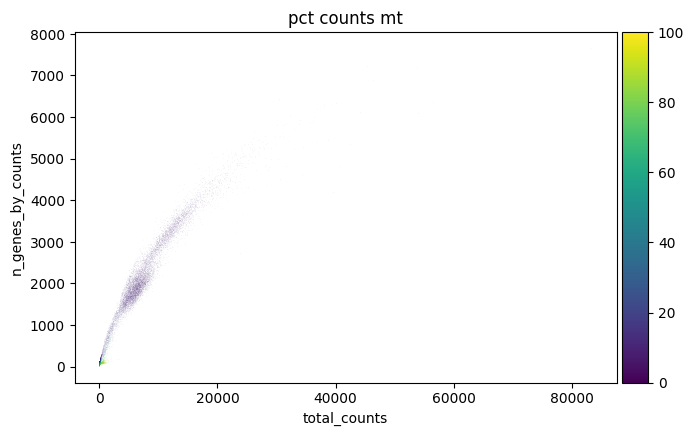

In [49]:
p1 = sns.displot(adata_raw.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata_raw, 'total_counts')
p2 = sc.pl.violin(adata_raw, "pct_counts_mt")
p3 = sc.pl.scatter(adata_raw, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [65]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

In [66]:
# We now apply this function to the log1p_total_counts, log1p_n_genes_by_counts 
# and pct_counts_in_top_20_genes QC covariates each with a threshold of 5 MADs.
adata_raw.obs["outlier"] = (
    is_outlier(adata_raw, "log1p_total_counts", 5)
    | is_outlier(adata_raw, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata_raw, "pct_counts_in_top_20_genes", 5)
)
adata_raw.obs.outlier.value_counts()

False    766218
True     370694
Name: outlier, dtype: int64

In [68]:
#pct_counts_Mt is filtered with 3 MADs. Additionally, cells with 
#a percentage of mitochondrial counts exceeding 8 % are filtered out
adata_raw.obs["mt_outlier"] = is_outlier(adata_raw, "pct_counts_mt", 3) | (
    adata_raw.obs["pct_counts_mt"] > 8
)
adata_raw.obs.mt_outlier.value_counts()

False    778221
True     358691
Name: mt_outlier, dtype: int64

In [70]:
#We now filter our AnnData object based on these two additional columns.
print(f"Total number of cells: {adata_raw.n_obs}")
adata_raw = adata_raw[(~adata_raw.obs.outlier) & (~adata_raw.obs.mt_outlier)].copy()

print(f"Number of cells after filtering of low quality cells: {adata_raw.n_obs}")

Total number of cells: 621373
Number of cells after filtering of low quality cells: 621373


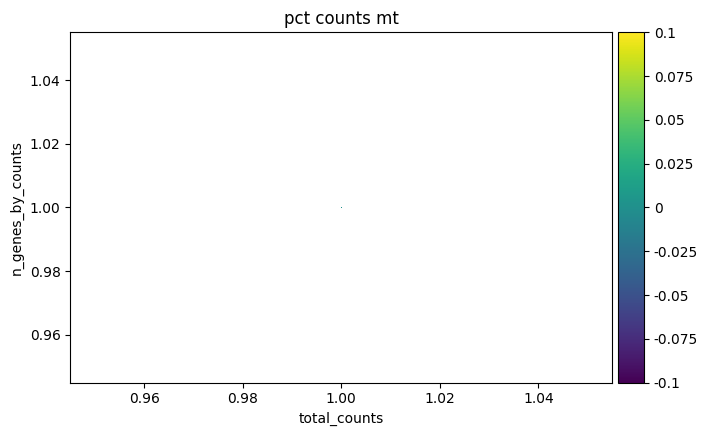

In [72]:
p1 = sc.pl.scatter(adata_raw, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [ ]:
adata.layers["log_transformed"] = np.log1p(adata.X)
adata.to_df(layer="log_transformed")


In [ ]:
#faire QC, %mh,..., après umap
#cellbender prendre .h5 comme input
# read -> cell ranger -> raw count matrix + matrix retiré les barces peu reads/les empty droplet